In [1]:
import numpy as np
import pymorphy2
import codecs
import math

In [2]:
mat_s = np.load('G:\!!!!!!!project/en_1000_freq_s.npy')
mat_v = np.load('G:\!!!!!!!project/en_1000_freq_v.npy')
print(mat_s.shape)
print(mat_v.shape)

(441237, 1000)
(1000,)


In [3]:
file_dict = codecs.open('G:\!!!!!!!project/unique_en_dict.txt',encoding='utf-8')

In [4]:
dict_words = {}
cnt = 0
line = (file_dict.readline().split())
while line:
    work_line = line[0]
    while (work_line[-1] == '?'):
        work_line = work_line[0:-1]
    dict_words[work_line] = cnt
    cnt += 1
    line = file_dict.readline().split()

In [5]:
print(dict_words['pencil'])

283361


In [8]:
#const
print(dict_words['pencil'])

283361


In [9]:
file_dict.close()

In [10]:
file_book = open('G:\!!!!!!!project/David_en.txt', 'r')
def get_vecotr_map(file_book):
    vectors = {}
    vector_map = list()
    cnt_bad = 0
    cnt_good = 0
    for line_in_book in file_book:
        line_in_book = (line_in_book.split())
        normal_form = line_in_book[0]
        if (dict_words.get(normal_form) != None):
            cnt_good += 1
            if (vectors.get(normal_form) == None): 
                vector_map.append(dict_words[normal_form])
                vectors[normal_form] = 1
            else:
                vectors[normal_form] += 1
        else:
            cnt_bad += 1
    print(len(vector_map))
    print(cnt_bad)
    print(cnt_good)
    file_book.close()
    return vector_map

In [11]:
vector_map = get_vecotr_map(file_book)

15861
14034
397293


In [12]:
print(vector_map)

[298122, 5455, 196101, 391989, 385360, 184050, 251029, 12022, 251037, 318619, 422605, 266678, 321440, 262794, 115428, 189702, 105075, 263069, 134649, 199238, 114625, 153204, 373310, 128737, 21550, 146571, 387225, 41502, 193119, 136002, 339358, 174347, 135087, 313953, 432528, 77452, 427246, 142802, 175505, 436072, 336187, 316405, 253700, 197062, 198823, 356055, 312135, 371007, 243383, 104761, 33584, 291444, 314481, 3718, 21, 223486, 99124, 339617, 233480, 77034, 385236, 10517, 92629, 423404, 311419, 428763, 225644, 285139, 78319, 299890, 118624, 32898, 8754, 83134, 330708, 369262, 14374, 303929, 174245, 119275, 77783, 221793, 284612, 208875, 187108, 358692, 283233, 211689, 108292, 19436, 71597, 403193, 192052, 381347, 270239, 11588, 20844, 131031, 18153, 190798, 174979, 425755, 103705, 357735, 295350, 181399, 197522, 341725, 435263, 427066, 87909, 86029, 181864, 44513, 16422, 157154, 181296, 141444, 123203, 439167, 263311, 117934, 382934, 408064, 194132, 78268, 242243, 28394, 217615, 24

In [13]:
x_1 = list()
y_1 = list()
z_1 = list()
cor_min = 10000
cor_max = -10000
cor_abs_num = 10000
for vec in vector_map:
    vec_space = mat_s[vec:vec+1,:] * mat_v
    for i in range(vec_space.shape[1]):
        if (vec_space[0,i] > cor_max):
            cor_max = vec_space[0,i]
        elif (vec_space[0,i] < cor_min):
            cor_min = vec_space[0,i]
        elif (abs(vec_space[0,i]) < cor_abs_num and abs(vec_space[0,i]) > 0):
            cor_abs_num = abs(vec_space[0,i])
    x_1.append(vec_space[0,0])
    y_1.append(vec_space[0,1])
    z_1.append(vec_space[0,2])
print(cor_min, cor_max, cor_abs_num)

-6.60850944613 1.48970440651 2.34183783565e-14


In [14]:
test = np.array([0.123, 0.167])
test = test // 0.01
print(test)

[ 12.  16.]


In [15]:

print(test)

[ 12.  16.]


In [16]:
def get_boxes(dim, step, vector_map, mat_s, mat_v):
    i = step
    vect_boxes_int = np.array([range(dim)])
    boxes_sum = list()
    first_box = 1
    dict_boxes = {}
    for vec in vector_map:
        vec_space = mat_s[vec:vec + 1,:] * mat_v
        vec_space = vec_space[:,0:dim]
        vec_space_int = vec_space // i
        vec_space_float = vec_space / i
        vec_space_list = list()
        for k in range(vec_space_int.shape[1]):
            vec_space_list.append(vec_space_int[0,k])
        key_tuple = tuple(x for x in vec_space_list)
        if (first_box):
            vect_boxes_int[0:1,:] = vec_space_int
            first_box = 0
            dict_boxes[key_tuple] = 1
        else:
            if (dict_boxes.get(key_tuple) != None):
                dict_boxes[key_tuple] += 1;
            else:
                vect_boxes_int = np.concatenate((vect_boxes_int, vec_space_int), axis=0)
                dict_boxes[key_tuple] = 1
    for j in range(vect_boxes_int.shape[0]):
        vec_space_list = list()
        for k in range(vect_boxes_int.shape[1]):
            vec_space_list.append(vect_boxes_int[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        boxes_sum.append(dict_boxes[key_tuple])
    mat_ans = np.array([boxes_sum])
    return mat_ans, vect_boxes_int, dict_boxes

In [17]:
def cut_box(ve_bo_30, mat_mes_30):
    ve_bo_30_div2 = np.array([])
    box_count_30_div2 = list()
    first_box_30_2 = 1
    dict_boxes_30_div2 = {}
    for j in range(ve_bo_30.shape[0]):
        temp_mat_8lines = np.array([])
        first_box_temp = 1
        for a in range(0, 2):
            for b in range(0, 2):
                for c in range(0, 2):
                    num_1 = ve_bo_30[j, 0]
                    num_2 = ve_bo_30[j, 1]
                    num_3 = ve_bo_30[j, 2]
                    if (first_box_temp):
                        temp_mat_8lines = np.array([[num_1 * 2 + a, num_2 * 2 + b, num_3 * 2 + c]])
                        first_box_temp = 0
                    else:
                        temp_mat_8lines = np.concatenate((temp_mat_8lines, np.array([[num_1 * 2 + a, num_2 * 2 + b, num_3 * 2 + c]])), axis=0)
        if (first_box_30_2):
            first_box_30_2 = 0;
            ve_bo_30_div2 = temp_mat_8lines
        else:
            ve_bo_30_div2 = np.concatenate((ve_bo_30_div2, temp_mat_8lines), axis=0)
        for k in range(2 ** 3):
            box_count_30_div2.append(mat_mes_30[0, j] / (2 ** 3))
    for j in range(ve_bo_30_div2.shape[0]):
        vec_space_list = list()
        for k in range(ve_bo_30_div2.shape[1]):
            vec_space_list.append(ve_bo_30_div2[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        dict_boxes_30_div2[key_tuple] = box_count_30_div2[j]
    return ve_bo_30_div2, dict_boxes_30_div2

In [18]:
def get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2):
    pair_p_q = list(tuple())
    for j in range(ve_bo_15.shape[0]):
        vec_space_list = list()
        for k in range(ve_bo_15.shape[1]):
            vec_space_list.append(ve_bo_15[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        pair_p_q.append((dict_boxes_15[key_tuple], dict_boxes_30_div2[key_tuple]))
    return pair_p_q

In [19]:
def sum_div(pair_p_q):
    sum = 0
    for k in range(len(pair_p_q)):
        sum += pair_p_q[k][0] * math.log(pair_p_q[k][0] / pair_p_q[k][1])
    return sum

In [84]:
min_ = 10000000
for i in range(-5, 40):
    eps = 1 / 2 ** i
    mat_mes_15, ve_bo_15, dict_boxes_15 = get_boxes(3, eps / 2, vector_map, mat_s, mat_v)
    mat_mes_30, ve_bo_30, dict_boxes_30 = get_boxes(3, eps, vector_map, mat_s, mat_v)
    ve_bo_30_div2, dict_boxes_30_div2 = cut_box(ve_bo_30, mat_mes_30)
    pair_p_q = get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2)
    print(sum_div(pair_p_q) / 15861, "     eps =", eps, ",       check eps / 2 =", eps / 2)

2.079441541679836      eps = 32.0 ,       check eps / 2 = 16.0
2.079441541679836      eps = 16.0 ,       check eps / 2 = 8.0
2.0789000514333713      eps = 8.0 ,       check eps / 2 = 4.0
2.077703412627808      eps = 4.0 ,       check eps / 2 = 2.0
2.0788939713000767      eps = 2.0 ,       check eps / 2 = 1.0
2.0734454491891787      eps = 1.0 ,       check eps / 2 = 0.5
2.0684668167098152      eps = 0.5 ,       check eps / 2 = 0.25
2.0624454409401536      eps = 0.25 ,       check eps / 2 = 0.125
2.0570655827594067      eps = 0.125 ,       check eps / 2 = 0.0625
2.036885138842764      eps = 0.0625 ,       check eps / 2 = 0.03125
2.0098090322988797      eps = 0.03125 ,       check eps / 2 = 0.015625
1.9488149441764029      eps = 0.015625 ,       check eps / 2 = 0.0078125
1.8526295266020225      eps = 0.0078125 ,       check eps / 2 = 0.00390625
1.6980609937917028      eps = 0.00390625 ,       check eps / 2 = 0.001953125
1.498441210237285      eps = 0.001953125 ,       check eps / 2 = 0.00

KeyboardInterrupt: 

[  0.00000000e+000   4.44754103e-312  -1.60451793e-002 ...,
  -3.67510352e-002  -3.67447275e-002  -3.67384294e-002] [  1.00000000e+000   4.44754103e-312  -4.49387779e-002 ...,
   2.68129774e-003   2.66988650e-003   2.65847513e-003] [  1.05000000e+000   4.44754103e-312  -9.80557834e-001 ...,
  -1.00835771e+000  -1.00835518e+000  -1.00835266e+000]
[ 0.          0.01        0.01989    ..., -9.13714936 -9.20226051
 -9.26764201] [  1.           0.999        0.99827053 ..., -15.64826433 -15.7404106
 -15.83231478] [  1.05         1.04719965   1.04441676 ...,  16.20260709  16.30237527
  16.40374419]


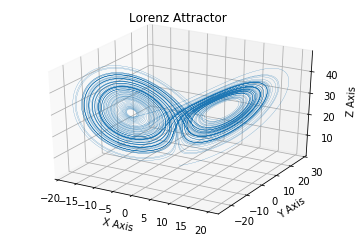

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.001
num_steps = 100000

# Need one more for the initial values
xs = np.empty((num_steps + 1,))
ys = np.empty((num_steps + 1,))
zs = np.empty((num_steps + 1,))
# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)
print(xs, ys, zs)
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

print(xs, ys, zs)
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [126]:
print(xs, ys, zs)
mat_xs = np.array([xs])
mat_ys = np.array([ys])
mat_zs = np.array([zs])
print(mat_xs.T)
mat_Lor = np.concatenate((mat_xs.T, mat_ys.T, mat_zs.T), axis=1)
print(mat_Lor.shape)

[ 0.          0.01        0.01989    ..., -9.13714936 -9.20226051
 -9.26764201] [  1.           0.999        0.99827053 ..., -15.64826433 -15.7404106
 -15.83231478] [  1.05         1.04719965   1.04441676 ...,  16.20260709  16.30237527
  16.40374419]
[[ 0.        ]
 [ 0.01      ]
 [ 0.01989   ]
 ..., 
 [-9.13714936]
 [-9.20226051]
 [-9.26764201]]
(100001, 3)


In [127]:
def get_boxes_2(dim, step, vector_map, mat_s, mat_v):
    i = step
    vect_boxes_int = np.array([range(dim)])
    boxes_sum = list()
    first_box = 1
    dict_boxes = {}
    for ind in range(vector_map.shape[0]):
        vec_space = vector_map[ind:ind+1,:]
        vec_space = vec_space[:,0:dim]
        #print(vec_space // i, vec_space / i, (vec_space / i) * 2 // 1)
        vec_space_int = vec_space // i
        vec_space_float = vec_space / i
        vec_space_list = list()
        for k in range(vec_space_int.shape[1]):
            vec_space_list.append(vec_space_int[0,k])
        key_tuple = tuple(x for x in vec_space_list)
        if (first_box):
            vect_boxes_int[0:1,:] = vec_space_int
            first_box = 0
            dict_boxes[key_tuple] = 1
        else:
            if (dict_boxes.get(key_tuple) != None):
                dict_boxes[key_tuple] += 1;
            else:
                vect_boxes_int = np.concatenate((vect_boxes_int, vec_space_int), axis=0)
                dict_boxes[key_tuple] = 1
    for j in range(vect_boxes_int.shape[0]):
        vec_space_list = list()
        for k in range(vect_boxes_int.shape[1]):
            vec_space_list.append(vect_boxes_int[j,k])
        key_tuple = tuple(x for x in vec_space_list)
        boxes_sum.append(dict_boxes[key_tuple])
    mat_ans = np.array([boxes_sum])
    return mat_ans, vect_boxes_int, dict_boxes

In [147]:
min_ = 10000000
x_res = np.empty((14,))
y_res = np.empty((14,))
for i in range(-10, 4):
    eps = 1 / 2 ** i
    mat_mes_15, ve_bo_15, dict_boxes_15 = get_boxes_2(3, eps / 2, mat_Lor, mat_s, mat_v)
    mat_mes_30, ve_bo_30, dict_boxes_30 = get_boxes_2(3, eps, mat_Lor, mat_s, mat_v)
    ve_bo_30_div2, dict_boxes_30_div2 = cut_box(ve_bo_30, mat_mes_30)
    pair_p_q = get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2)
    #print(pair_p_q)
    x_res[i + 10] = math.log(eps, 2)
    y_res[i + 10] = sum_div(pair_p_q) / 100001
    print(sum_div(pair_p_q) / 100001, "     eps =", eps, ",       check eps / 2 =", eps / 2, mat_mes_30.shape, mat_mes_15.shape)
    #now = sum_div(pair_p_q)
    #if (now < min_):
        #min_ = now
#print(min_, "     eps =", eps, ",       check eps / 2 =", eps / 2)

2.0794415416798353      eps = 1024.0 ,       check eps / 2 = 512.0 (1, 4) (1, 4)
2.0794415416798353      eps = 512.0 ,       check eps / 2 = 256.0 (1, 4) (1, 4)
2.0794415416798353      eps = 256.0 ,       check eps / 2 = 128.0 (1, 4) (1, 4)
2.0794415416798353      eps = 128.0 ,       check eps / 2 = 64.0 (1, 4) (1, 4)
1.588618003573682      eps = 64.0 ,       check eps / 2 = 32.0 (1, 4) (1, 8)
1.3381282033261162      eps = 32.0 ,       check eps / 2 = 16.0 (1, 8) (1, 24)
0.8688198777500912      eps = 16.0 ,       check eps / 2 = 8.0 (1, 24) (1, 79)
0.7408532494284823      eps = 8.0 ,       check eps / 2 = 4.0 (1, 79) (1, 269)
0.7132309621390783      eps = 4.0 ,       check eps / 2 = 2.0 (1, 269) (1, 953)
0.7294214029862164      eps = 2.0 ,       check eps / 2 = 1.0 (1, 953) (1, 3220)
0.8253398383467588      eps = 1.0 ,       check eps / 2 = 0.5 (1, 3220) (1, 10265)
0.999254723191566      eps = 0.5 ,       check eps / 2 = 0.25 (1, 10265) (1, 27243)
1.2604573003024184      eps = 0.25 ,  

[ 10.   9.   8.   7.   6.   5.   4.   3.   2.   1.   0.  -1.  -2.  -3.] [ 2.07944154  2.07944154  2.07944154  2.07944154  1.588618    1.3381282
  0.86881988  0.74085325  0.71323096  0.7294214   0.82533984  0.99925472
  1.2604573   1.54860517]


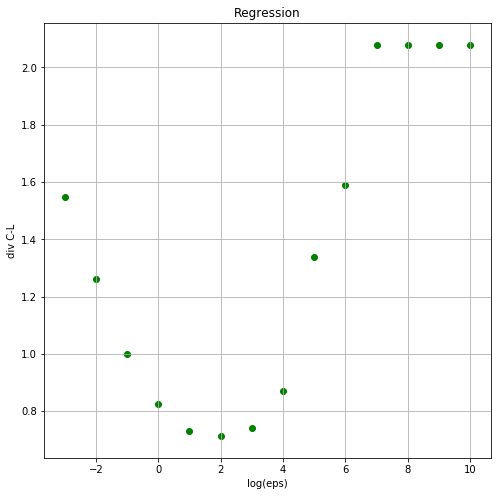

In [149]:
print(x_res, y_res)
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.title('Regression')
plt.ylabel('div C-L')
plt.xlabel('log(eps)')
plt.legend()
plt.scatter(x_res, y_res, color='green', label='poly_of_20_degree')
plt.show()

In [151]:
eps = 2 ** 2
mat_mes_15, ve_bo_15, dict_boxes_15 = get_boxes_2(3, eps / 2, mat_Lor, mat_s, mat_v)
mat_mes_30, ve_bo_30, dict_boxes_30 = get_boxes_2(3, eps, mat_Lor, mat_s, mat_v)
ve_bo_30_div2, dict_boxes_30_div2 = cut_box(ve_bo_30, mat_mes_30)
pair_p_q = get_pair_p_d(ve_bo_15, dict_boxes_15, ve_bo_30, dict_boxes_30_div2)
print(mat_mes_30)    

{(-0.0, 0.0, 0.0): 161, (0.0, 1.0, 0.0): 61, (0.0, 2.0, 0.0): 6, (1.0, 2.0, 0.0): 31, (1.0, 3.0, 0.0): 12, (1.0, 3.0, 1.0): 36, (1.0, 4.0, 1.0): 4, (2.0, 4.0, 1.0): 15, (2.0, 4.0, 2.0): 47, (2.0, 5.0, 2.0): 16, (2.0, 5.0, 3.0): 28, (3.0, 5.0, 3.0): 4, (3.0, 6.0, 3.0): 8, (3.0, 6.0, 4.0): 12, (3.0, 6.0, 5.0): 15, (4.0, 6.0, 5.0): 1, (4.0, 6.0, 6.0): 11, (4.0, 6.0, 7.0): 18, (4.0, 6.0, 8.0): 10, (4.0, 6.0, 9.0): 7, (4.0, 5.0, 9.0): 28, (4.0, 5.0, 10.0): 10, (4.0, 4.0, 10.0): 32, (4.0, 4.0, 11.0): 9, (4.0, 3.0, 11.0): 14, (4.0, 2.0, 11.0): 34, (4.0, 2.0, 12.0): 8, (4.0, 1.0, 12.0): 11, (4.0, 0.0, 12.0): 2, (4.0, 0.0, 11.0): 4, (3.0, 0.0, 11.0): 22, (3.0, -1.0, 11.0): 16, (3.0, -2.0, 11.0): 4, (2.0, -2.0, 10.0): 23, (2.0, -2.0, 9.0): 26, (1.0, -3.0, 9.0): 24, (1.0, -3.0, 8.0): 3, (0.0, -3.0, 8.0): 33, (0.0, -3.0, 7.0): 2, (-1.0, -3.0, 7.0): 58, (-2.0, -3.0, 7.0): 9, (-2.0, -3.0, 6.0): 642, (-3.0, -3.0, 6.0): 1746, (-3.0, -3.0, 7.0): 1665, (-3.0, -2.0, 7.0): 1296, (-3.0, -2.0, 6.0): 99, (-2